In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_pickle('tweets_with_labels.pkl')

In [4]:
# check if any sentiment label is missing
print(df['sentiment_label'].isnull().sum() + df['sentiment_label'].isna().sum() + (df['sentiment_label'] == "").sum())

0


## Calculate the labels
note that the one on polybox is already with all the labels. No need to run these again

In [5]:
# load tweets.pkl
df = pd.read_pickle('tweets.pkl')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,anticipation_prob,disgust_prob,fear_prob,joy_prob,love_prob,optimism_prob,pessimism_prob,sadness_prob,surprise_prob,trust_prob
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,...,0.320870,0.146106,0.133621,0.018759,0.002608,0.014057,0.064718,0.156217,0.087268,0.007338
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",...,0.576183,0.004451,0.043306,0.189257,0.002931,0.123739,0.003583,0.002220,0.027095,0.023936
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",...,0.754294,0.005080,0.005598,0.106353,0.002909,0.047832,0.003104,0.002245,0.043926,0.024446
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,...,0.048652,0.000436,0.001184,0.626578,0.003508,0.301623,0.000384,0.000326,0.003269,0.013409
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,...,0.283672,0.025936,0.013733,0.014121,0.001179,0.562736,0.024811,0.017232,0.005735,0.025889


Smart money's on the market crashing by June '21. Crypto won't be immune. This isn't financial advice, I'm just goi… https://t.co/W55FXD0bvy
['joy', 'anticipation', 'optimism', 'anger', 'sadness', 'disgust', 'others (4)']
82667
[2702054, 894842, 637153, 220550, 163301, 149433, 82667]


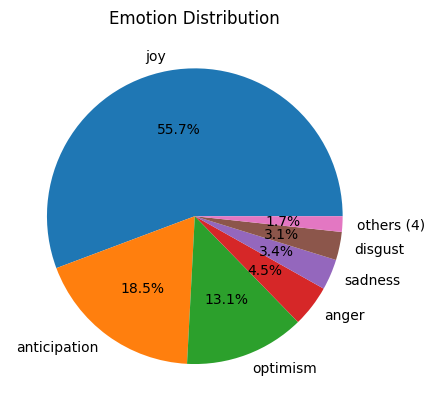

In [14]:
# emotion is one of 'anger', 'anticipation', 'disgust', 'fear', 'joy' 'love' 'optimism' 'pessimism' 'sadness' 'surprise' 'trust'
# calculate label based on which probability is the highest
# df["emotion_label"] = df[['anger_prob', 'anticipation_prob', 'disgust_prob', 'fear_prob', 'joy_prob', 'love_prob', 'optimism_prob', 'pessimism_prob', 'sadness_prob', 'surprise_prob', 'trust_prob']].idxmax(axis=1).str.replace('_prob', '')
# print(df['emotion_label'].value_counts())

# show the one pessimism tweet

print(df[df['emotion_label'] == 'pessimism']['text'].values[0])

# graph a pie chart

import matplotlib.pyplot as plt

labels = df['emotion_label'].value_counts().index
sizes = df['emotion_label'].value_counts().values

# combine fear, surprise, love, pessimism

labels = list(labels)[:-4] + ['others (4)']
print(labels)
others = sum(list(sizes)[-4:])
print(others)
sizes = list(sizes)[:-4] + [others]
print(sizes)



fig1, ax1 = plt.subplots()
plt.title('Emotion Distribution')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [5]:
# show some joyful tweets
df[df['emotion_label'] == 'joy'].sample(20)['text'].tolist()

['@AltcoinGordon $SHIFT TRAIN &amp; EARN CRYPTO @shift_token \n🏋️ #SHIFT - $SHIFT\n🏋️ #SHIFTFIT - #SHIFTNATION\n🏋️ #SHIFTAPP - #GYM #CROSSFIT #FITNESS\n🏋️ #LETSGETFIT #TRAINTOEARN \n🏋️ #MOVE2EARN -\xa0 #MOVETOEARN\n🏋️ #ETH #BTC #Crypto #COMPETITION',
 'If you download strike app \nAnd sign up\nWe both get a free $10\nAny supporters?\n\nhttps://t.co/AnClYeVD4h\n\n#ethereum \n#Bitcoin\n#cryptocurrency\n#CryptoCommunity',
 '@LUCKDOGE_TOKEN Nice project and congratulations to the team for their efforts and dedication and highly appreciated the visionary thought of the projector and it will go to moon. @IlhamMafian @arry300397 @Putraefri3 \n\n #LuckDoge #BNB #100xCoin #BabyDogeCoin #Bitcoin #BSC #ElonMusk #MISSDOGE',
 '#Bitcoin price in Canadian Dollar $BTC $XBT $BTCCAD \nBTC Price Now : 77,524.12$ CAD \nAvg Last Hour : 77,700.86$ \nAvg 24 Hours : 78,608.10$ \n24h Change : -2.58% \n24h Low : 76,993.83$ \n24h High : 81,860.99$  \nMore information here https://t.co/AnKnaDahL6 https://t.co/4uy

irony_label
False    4478052
True      371948
Name: count, dtype: int64


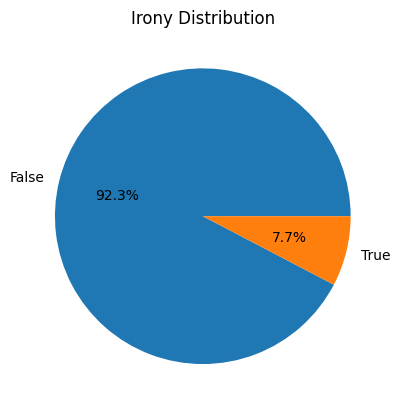

In [11]:
# irony is just represented as 'irony prob'
# calculate label 
df["irony_label"] = df['irony_prob'] > 0.5
print(df['irony_label'].value_counts())

# graph a pie chart
labels = df['irony_label'].value_counts().index
sizes = df['irony_label'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Irony Distribution') 
plt.show()

sentiment_label
neutral     2608292
positive    1859399
negative     382309
Name: count, dtype: int64


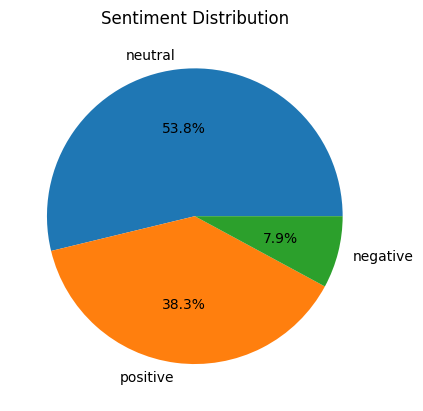

In [12]:
# sentiment is one of 'positive', 'negative', 'neutral'
# calculate label based on which probability is the highest
df["sentiment_label"] = df[['positive_prob', 'negative_prob', 'neutral_prob']].idxmax(axis=1).str.replace('_prob', '')
print(df['sentiment_label'].value_counts())

# graph a pie chart
labels = df['sentiment_label'].value_counts().index
sizes = df['sentiment_label'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

### If you want to save the dataframe with the labels

In [30]:
# save as new pickle with the labels added
new_file_name = 'tweets_with_labels.pkl'
if not os.path.exists(new_file_name):
    df.to_pickle(new_file_name)
else:
    print('File already exists')

## Examples 

In [31]:
# pick some examples of positive sentiment, show their text
df[df['sentiment_label'] == 'positive'].sample(5)['text'].tolist()

["@Jhamm_nd @AstroZeroNFT LFG! I'm there \n\n#ELONONE #ELON1 $EONE #ElonMusk #cryptocurrency #BTC #Ethereum #ETH #NFTCommunity #NFTProject #Crypto #P2E",
 '@GFCtokenglobal @pinkecosystem Really very nice project\n@KoushickSardar \n@Akashraf14 \n@RudroBiswasRB1 \n@Tuhin252499 \n@GFCtokenglobal \n@pinkechaubey \n#btc\n#Eth\n#BSC',
 'And #Bitcoin $BTC will continue to be the king of crypto, with more push. https://t.co/QqFUtPa64I',
 "the golden bullrun is here\n#bitcoin up\n$woo upper\n@lunar_brain upperer\n@bulmafi upperst\n\nwish my dick still went up, but can't have everything i guess",
 '@FantomLiveS This is Awsome project.. everyone join us.. \n\n@Simanto__saha\n@Rakibul78729782\n@NazimUd36649399 \n#Fantom #Fantomlive #FTM #FTL #Airdrop #Metaverse #Blockchain #Bitcoin']

In [32]:
# pick some examples of negative sentiment, show their text
df[df['sentiment_label'] == 'negative'].sample(5)['text'].tolist()

["This new scam coin has a photo of Quentin Tarantino as one of their team members. Don't buy this bullshit. 😂😂😂👉 @BabyBITC_bsc\n\nhttps://t.co/t0nqWfqPAo 《 #SCAM #cryptocurrencies #cryptotrading #BTC",
 '@CryptosR_Us Bruh, take a vacation enough #bitcoin already.',
 "#BTC Weekly Chart Revised:  Finding support at very bottom of Ichimoku Cloud.  A drop from here would be more than a dump. It would be a CRASH !! The stability of the #Crypto market is on a razor's edge right now. Bearish pin bars on the weekly wicks. #Bitcoin at edge of a cliff https://t.co/K3Vt2CNWS5",
 'You are witnessing the first of many "flippenings" - infection of politics with cryptocurrencies.\n\nWhat these "crypto" dorks need to realize sooner than later is that there is only ONE truly hard and uncontrollable currency that will eat everything else alive. #Bitcoin https://t.co/tHPczDNiB6',
 'It’s educational. But still painful at. #bitcoin @saylor https://t.co/4zRzC3jwIy']

In [16]:
# pick some examples of neutral sentiment, show their text
df[df['sentiment_label'] == 'neutral'].sample(10)['text'].tolist()

['$ZEC TP2 cashed out here 60% of position still open\n\n#ZEC #BTC #ETH #Crypto #cryptocurrency #DayTrading #Trading #Futures #BNB #Binance #SOL https://t.co/5Sc78izV8c',
 'With the continued growth in US debt and corresponding debt levels in other countries such as #Australia , expect inflation to continue to rise into the future and for more value to move to hard assets such as #Bitcoin.',
 '@ln_strike when EU? I need my paycheque automatically converted into #Bitcoin ASAP',
 "https://t.co/ybELeYsIyQ \n'Bloomberg Surveillance: Early Edition' Full\n(11/10/22) \n \n#finance #business #money #investing #financialfreedom #investment #entrepreneur #trading #stockmarket #stocks #wealth #invest #bitcoin #success #forex... https://t.co/xaVe7zA03D",
 '#Slippage #Crypto #CryptoNews #Cryptocurrency #Cryptocurrencies\n#Bitcoin #ETH #BNB #TeamFollowBack #FollowBack #DEFI #NFTs\n\nTrader Who Called 2022 Crypto Collapse Predicts 248% Rally for Solana-Based Altcoin – Here’s His Target\nhttps://t.co/

In [17]:
# pick some examples of irony, show their text
df[df['irony_label'] == True].sample(20)['text'].tolist()

['@theJagmeetSingh Go ahead with your Parliamentary Investigation right away!\n\nIt will show Corps have no earnings, are EXPOSED to monetary inflation and likely cause a global stock market crash...\n\n...thereby making me and my friend #Bitcoin  rich.🙂',
 'Bitcoin to dollar  #Bitcoin https://t.co/3jql9X1a3Q',
 '@BuenoForMiami Life without parole for running an illegal website is cruel and unusual punishment. A crime against humanity is being committed in order to instill fear in others. \n\n#Bitcoin',
 'New video from the one and only Altcoin Daily #bitcoin https://t.co/HGvcPM5MTC',
 'who created this fucking #Bitcoin!  no human being can express his pride especially for such a success!  so it may be an organization to test world population and mass use ... who invented the internet?  ... make your own conclusion 😉 #cryptocurrency #ETH #btc',
 "Talk about flip flopping….\nCramer 'sold almost all' of his #bitcoin , fearing China has had it with crypto - CNBC https://t.co/fvAMY1eqEk",


In [18]:

# pick some examples of irony, show their text
df[df['irony_label'] == False].sample(20)['text'].tolist()

['#Tesla May Accept #Bitcoin Once #Crypto #Mining Makes #Green Shift - via \u2066@business\u2069 #disruption #blockchain #fintech #finserv #VC #payment #banking #trading #altcoins #elonmusk #ETH #Doge 👇 https://t.co/NkxSBNrveI',
 '1 Bitcoin ( #BTC )\nDollar: 19,320.18$ \n\n1 Bitcoin Cash ( #BCH )\nDollar: 1,06.08$ \n\n1 Ethereum ( #ETH )\nDollar: 1,071.91$ \n\n1 Ripple ( #XRP )\nDollar: 0.31553$ \n\nDate: 2 Jul 2022 22:14\n\n#Bitcoin #Ethereum #cryptocurrency #crypto #altcoin #Blockchain #Ripple  #العملات_الرقمية',
 '#BTC 21M - Is going up forevever.....Nooo!📉📉😭😭\n\nBuy #BNBTC early! Buy low! No downside as #BTC!\n#BNBTC #BTC #Eth  #BSC #BNB #Ada #Matic #Terra #CRO #Ltc #Ftt #Doge #Babydoge #Feg #Shiba #Sol #Floki #Raca #Dot #Avax #Xrp #Link #Algo #Ftm #Saylor #Michaelsaylor https://t.co/dKwlmWRP6Y',
 'Champ-Bo #32 is now listed \n.\nLink in bio 🔥\n.\n\n#nfts #nft #nftart #nftcommunity #nftcollector #nftartist #cryptoart #digitalart #art #crypto #ethereum #blockchain #opensea #nftcolle

In [35]:
# pick some examples of anger, show their text
df[df['emotion_label'] == 'anger'].sample(5)['text'].tolist()

["Your Condition is not even as critical as those I've Handled\n\nInbox me, If you still want your Account Back!!!\n\nI'm available 24/7 for all Hacking Services\n#Hack #coinbase #Hacking #bitcoin   #bnb  #privacy",
 "@cz_binance #Bitcoin  It should definitely be banned. I don't believe in bitcoin anymore, people's homes were destroyed for the sake of a demon.",
 '$BTC #bitcoin seems like a currency that can easily be manipulated by the richest.',
 'The biggest pump &amp; dump ponzi scheme in modern day history.The peasants never learn. #Bitcoin #BTC$BTC',
 "Don't believe this shit. They just want enough people to buy it in the hopes it pushes up the price. #Bitcoin #BTC #Cryptocurency https://t.co/55AlJLb5Kh"]

In [36]:
# pick some examples of anticipation, show their text
df[df['emotion_label'] == 'anticipation'].sample(5)['text'].tolist()

['Or just DCA #Bitcoin and ignore the rest of the noise. https://t.co/NiYY8XoLQP',
 'Where do you think we are in the #Bitcoin market cycle? https://t.co/CZ3lCHYQ9g',
 '🔥Read to the end👇👇🔥🔥 \nAre you looking for a reliable broker. Check this out! To trade volatility indices VIX https://t.co/n1Ud7gZzcF \n👇 1. Click the link☝️, supply your email. Confirm email in your inbox. dm for help #Ethereum #NFTs #Bitcoin #Forex #Binance #btc #deriv (10)',
 '#Bitcoin Last Price $19345 #BTC 🚀\nDaily Indicators:\n•Pivot Fibonacci:\n -Support 1: 18338\n -S2: 17237\n -S3: 15455\n -Middle: 20119\n -Resistance 1: 21901\n\n#Ethereum Last Price $1315 #ETH\n•Pivot:\n -S1: 1227\n -S2: 1093\n -S3: 874\n -M: 1446\n -R1: 1664\n\n#Crypto #DeFi\n(3/6)\n284252',
 '[NEW] Father of the Internet Says Web 3.0 Doesn’t Need Blockchain Technology + https://t.co/FhTX76OsVZ #bitcoin #btc #cryptocurrency #crypto #blockchain']

In [37]:
# pick some examples of optimism, show their text
df[df['emotion_label'] == 'optimism'].sample(5)['text'].tolist()

['[1D] #Bitcoin market is strongly trending up current momentum suggests the market is overbought. #options #markets #best visit: https://t.co/yuSljvM9Fq for more!',
 '@NFTDigiart @MMFcrypto @MMFcrypto The Madness Continues. Check This Out 👇💯❌️💎🔥🚀👇\nhttps://t.co/d4RuXaLKhi\n#MMFinance #mmf #100xgem #DeFi #passiveincome #Cronos #CRO #Bitcoin #ETH #MUSD #burrow $BURROW $MUSD #CRYPTOFixThingz #CryptoIsOurFuture https://t.co/RTvbB5BCNa https://t.co/uxlxCARU5A',
 'This will help you not to think about #BTC right now.\n\n$EGLD $ONE $BTC $MEX $RIDE $LINA $FUSE https://t.co/sJk9P8oGzz',
 "#bitcoin is going to infinity and there's nothing you or I or anyone can do about it.",
 '@ReforgedSwordo Nope, bc #Bitcoin was the first to solve the Byzantin General Problem.']